---

<h1 align="center"><b>Credit Risk & Loan Default Prediction</b></h1>

---

## 1. Import Libraries

Let's import some important libraries.  

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


# Model Evaluation
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    roc_curve
)

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Miscellaneous
import warnings
warnings.filterwarnings('ignore')


## 2. Import Data 

Now import the dataset.  

In [2]:
data = pd.read_csv('/kaggle/input/loan-default/Loan_default.csv')

# Display first few rows
data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


## 3. Basic Info and Overview

Let's check some basic info like shape of the dataset, missing values, and summary statistics.

In [3]:
# Check dataset shape and basic info
print("Dataset Shape:", data.shape)
print("\nDataset Info:")
data.info()

Dataset Shape: (255347, 18)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner  

In [4]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64


In [5]:
# Display basic statistical summary
data.describe()


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


## 4. Exploratory Data Analysis

Now it's time for the EDA. let's uncover the relationships and patterns between variavles.

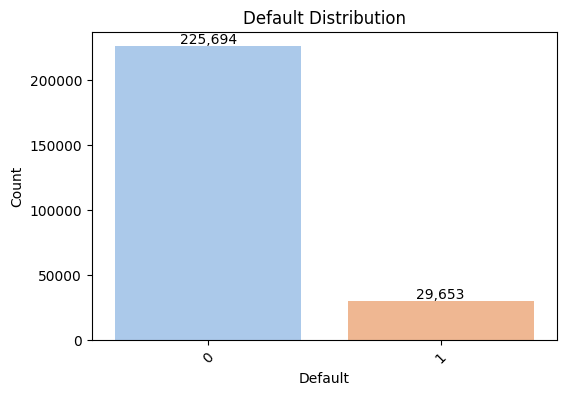

In [6]:
# Target distribution
def plot_target_distribution(data):
    plt.figure(figsize=(6, 4))
    sns.countplot(x='Default', data=data, palette='pastel')
    plt.title("Default Distribution")
    plt.xlabel("Default")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    # annotate counts on bars
    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(format(int(p.get_height()), ","), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom')
    plt.show()

# Call the function
plot_target_distribution(data)

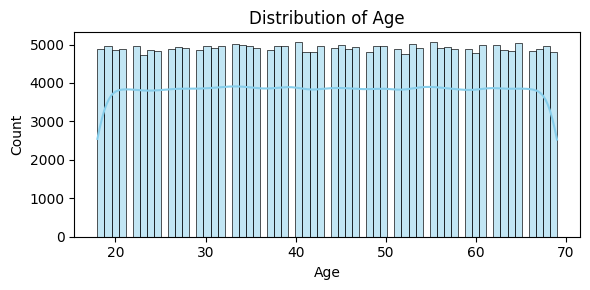

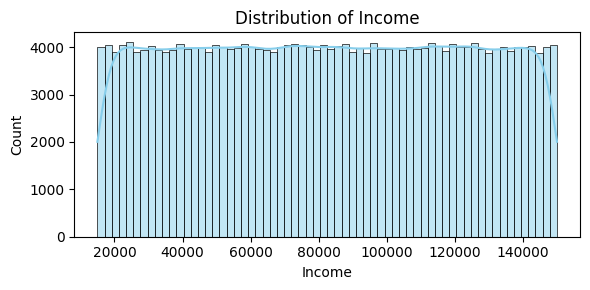

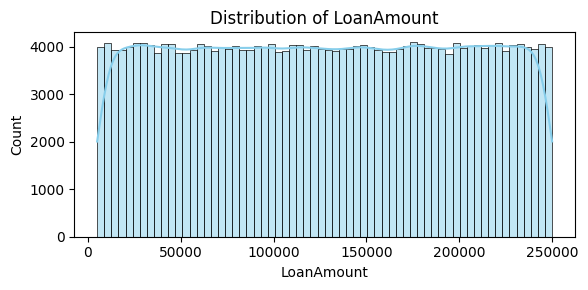

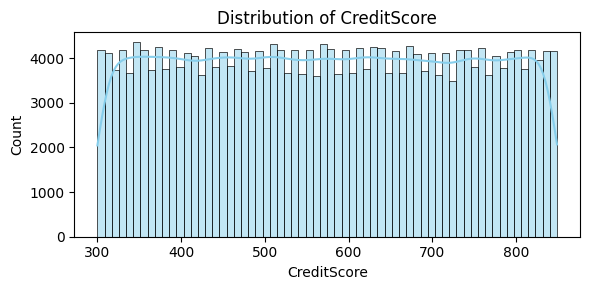

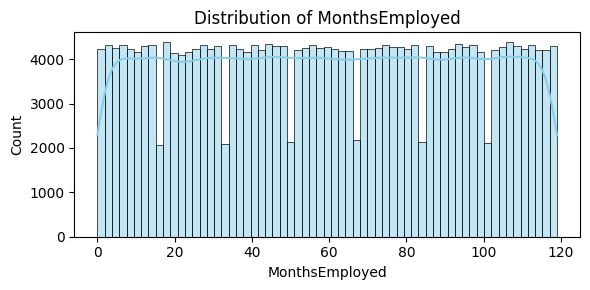

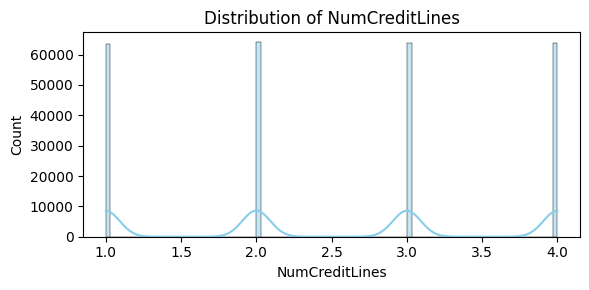

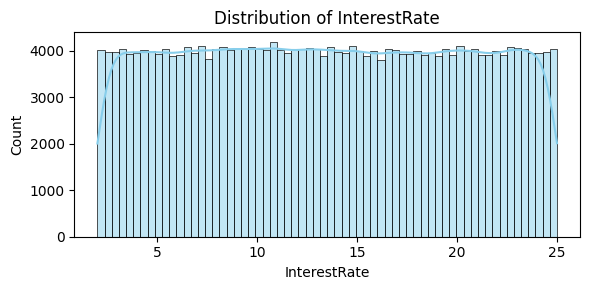

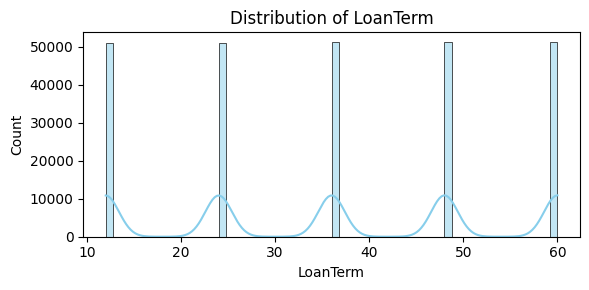

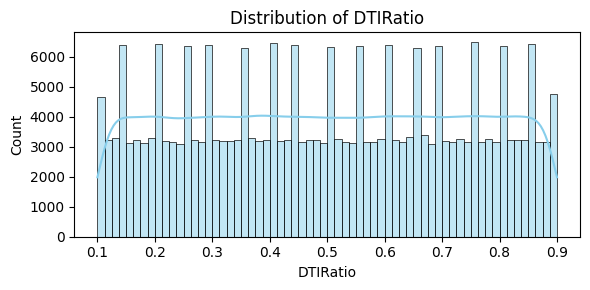

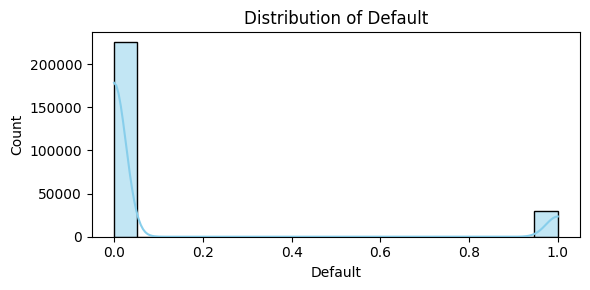

In [7]:
# Identify numeric columns first
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution plots for numeric columns
for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(data[col], kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


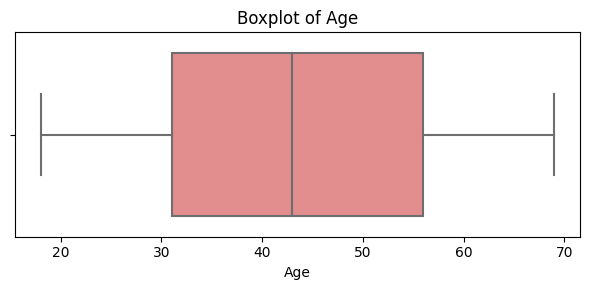

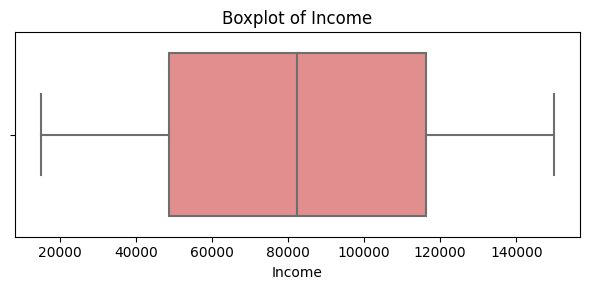

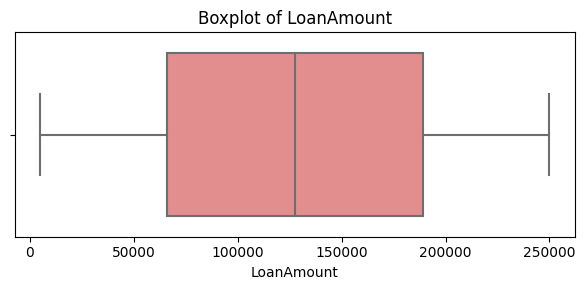

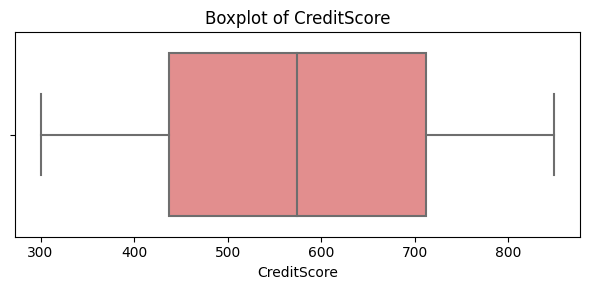

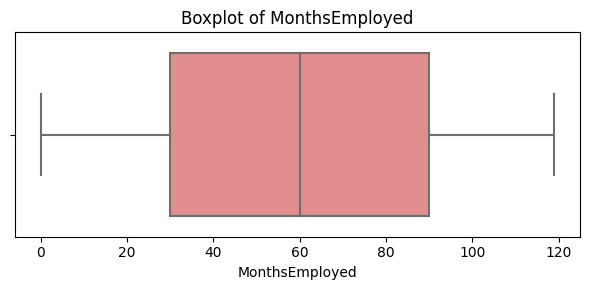

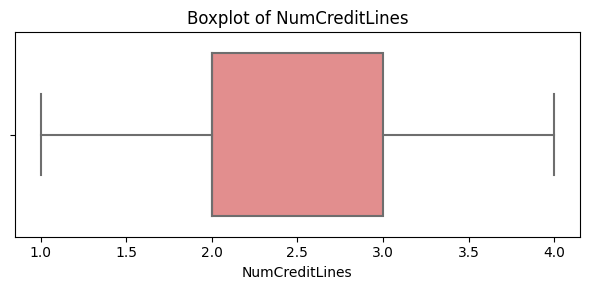

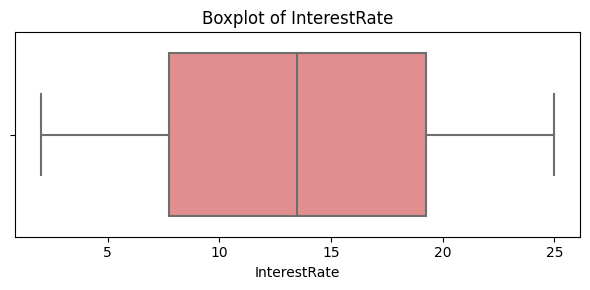

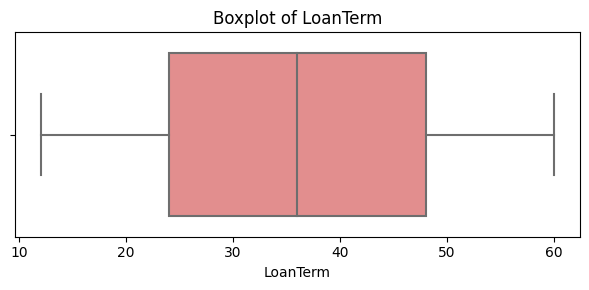

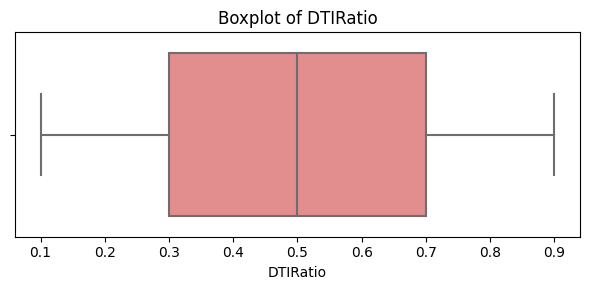

In [8]:
#  Boxplots to inspect outliers for numeric features
numeric_cols = data.select_dtypes(include=[np.number]).columns.drop(['Default'], errors='ignore').tolist()

for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=data[col], color='lightcoral')
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


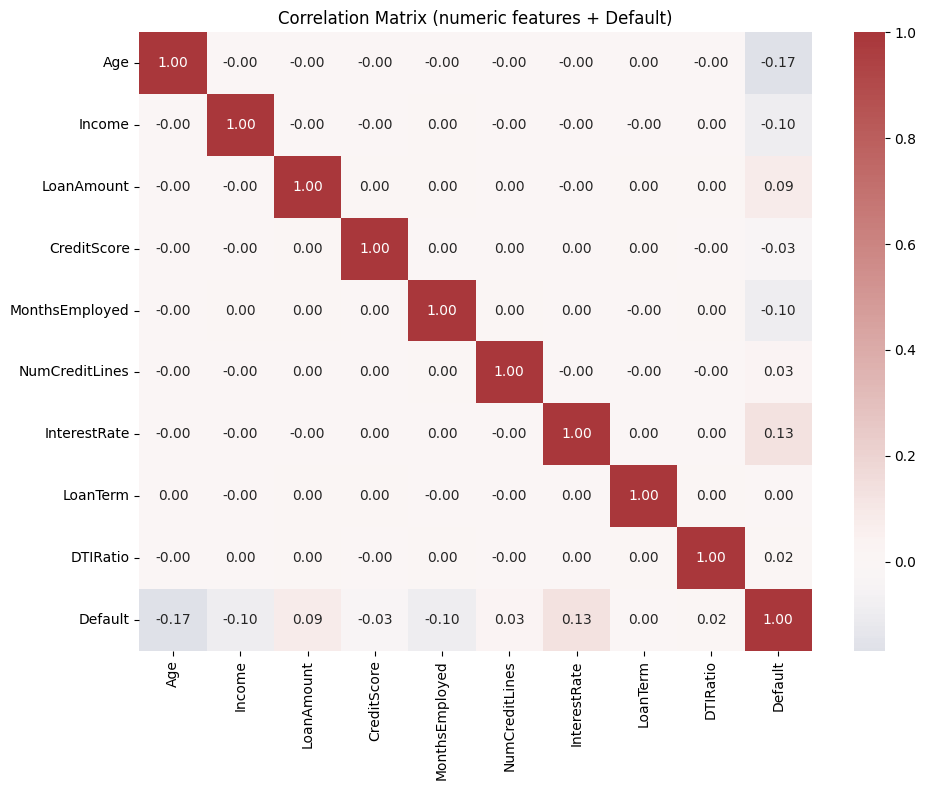

In [9]:
# ensure numeric_cols exists (don't overwrite if already defined)
if 'numeric_cols' not in globals():
    numeric_cols = data.select_dtypes(include=[np.number]).columns.drop(['Default'], errors='ignore').tolist()

#  Correlation heatmap for numeric features (including target)
plt.figure(figsize=(10, 8))
corr_cols = [c for c in numeric_cols if c in data.columns] + (['Default'] if 'Default' in data.columns else [])
sns.heatmap(data[corr_cols].corr(), annot=True, fmt='.2f', cmap='vlag', center=0)
plt.title("Correlation Matrix (numeric features + Default)")
plt.tight_layout()
plt.show()

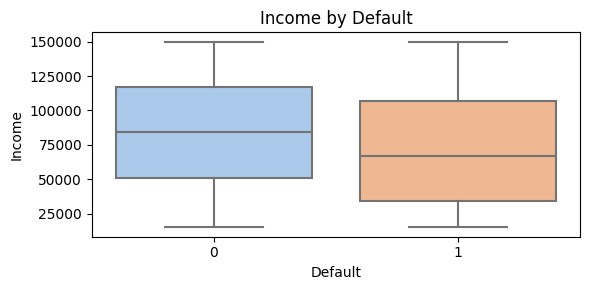

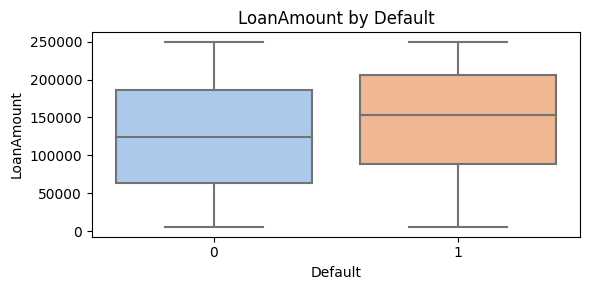

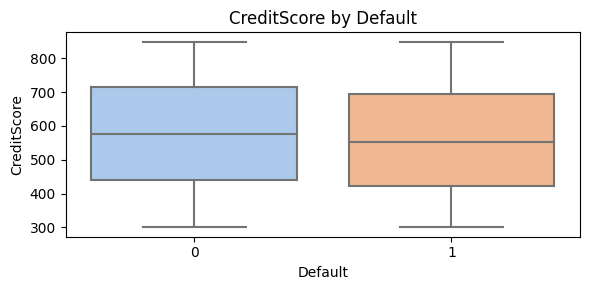

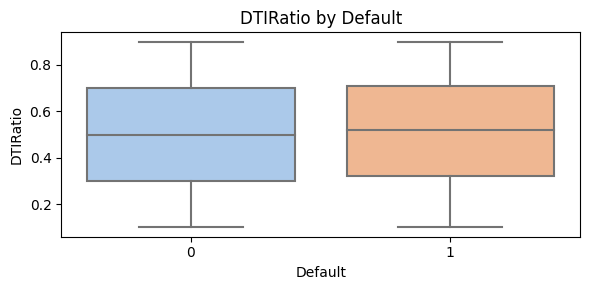

In [10]:
#  Boxplots of numeric features split by Default
box_features = [f for f in ['Income', 'LoanAmount', 'CreditScore', 'DTIRatio'] if f in data.columns]
for col in box_features:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x='Default', y=col, data=data, palette='pastel')
    plt.title(f"{col} by Default")
    plt.tight_layout()
    plt.show()

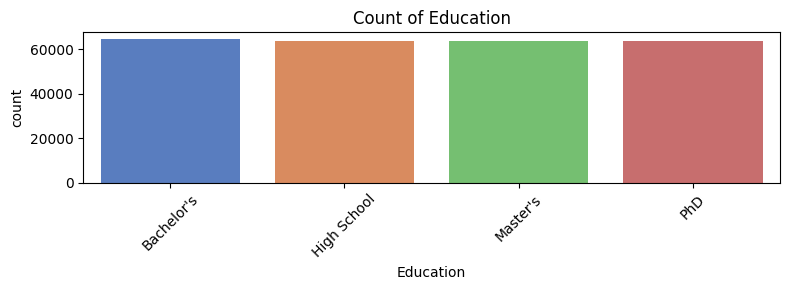

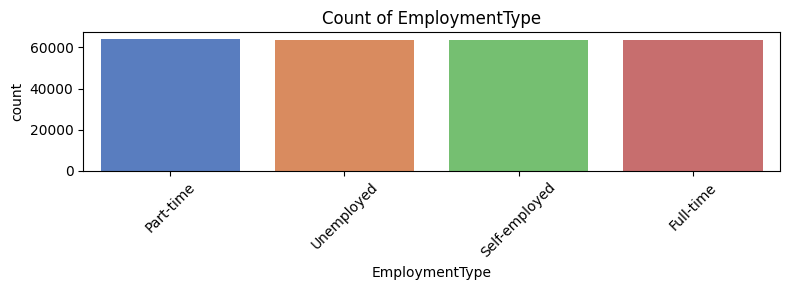

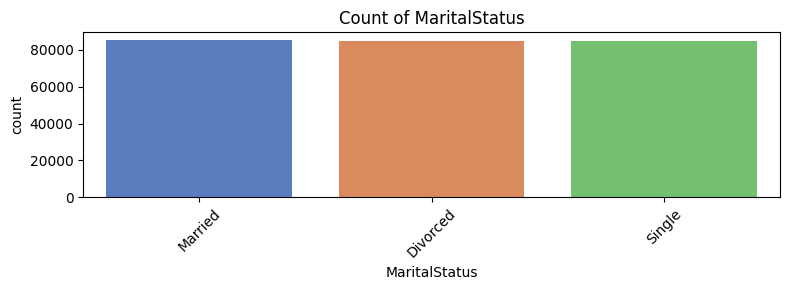

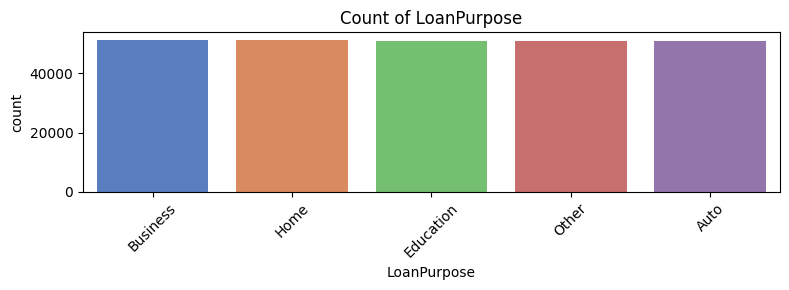

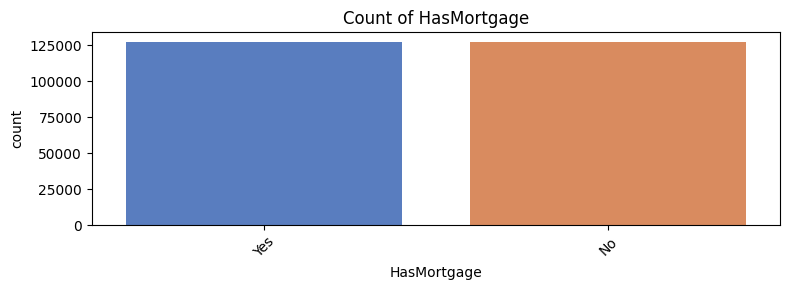

In [11]:
#  Countplots for main categorical features
cat_features = [f for f in ['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose', 'HasMortgage'] if f in data.columns]
for col in cat_features:
    plt.figure(figsize=(8, 3))
    sns.countplot(x=col, data=data, order=data[col].value_counts().index, palette='muted')
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

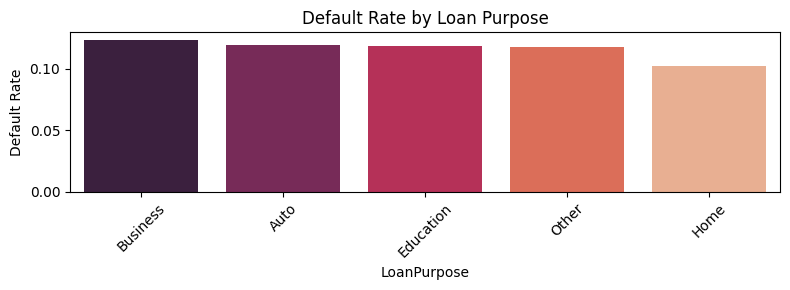

In [12]:
#  Default rate by categorical feature (example: LoanPurpose)
if 'LoanPurpose' in data.columns:
    purpose_rate = data.groupby('LoanPurpose')['Default'].mean().sort_values(ascending=False)
    plt.figure(figsize=(8, 3))
    sns.barplot(x=purpose_rate.index, y=purpose_rate.values, palette='rocket')
    plt.ylabel("Default Rate")
    plt.title("Default Rate by Loan Purpose")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [13]:

#  Scatterplots for selected numeric pair_features (uses existing pair_features if present)
if 'pair_features' in globals() and isinstance(pair_features, list) and len(pair_features) >= 2:
    for i in range(len(pair_features) - 1):
        x = pair_features[i]
        y = pair_features[i + 1]
        if x in data.columns and y in data.columns:
            plt.figure(figsize=(7, 5))
            sns.scatterplot(x=x, y=y, hue='Default' if 'Default' in data.columns else None,
                            data=data.sample(min(5000, len(data))), alpha=0.6, palette='Set1')
            plt.title(f"{y} vs {x}")
            plt.tight_layout()
            plt.show()
else:
    print("Not enough pair_features for scatterplots. Found:", pair_features if 'pair_features' in globals() else None)

Not enough pair_features for scatterplots. Found: None


## 5. Data Preprocessing 

Before train the model preprocessing is one of important steps, so let's clean the data, drop irrelevant columns, handle missing values, encode categorical variables, separate features and target, scaling and finally splitting the dataset in training and testing set.

In [14]:
# Data Preprocessing 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1) Drop irrelevant columns
if 'LoanID' in data.columns:
    data = data.drop('LoanID', axis=1)

# 2) Handle missing values
data = data.dropna()  # alternatively: data.fillna(method='ffill', inplace=True)

# 3) Encode categorical variables
categorical_cols = [
    'Education', 'EmploymentType', 'MaritalStatus',
    'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner'
]

le = LabelEncoder()
for col in categorical_cols:
    if col in data.columns:
        data[col] = le.fit_transform(data[col].astype(str))

# 4) Separate features and target variable
X = data.drop('Default', axis=1)
y = data['Default']

# 5) Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6) Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (178742, 16)
Testing set shape: (76605, 16)


## 6. Model Training and Evaluation 

Now it's time to train models and then check the performance of models using different metrics, including accuracy, precision, recall,	F1-score,	ROC-AUC, specificity, and sensitivity.

In [15]:
# Model Training and Evaluation 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import pandas as pd

# use only faster models
models = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(tree_method='gpu_hist', predictor='gpu_predictor', 
                                   use_label_encoder=False, eval_metric='logloss', random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)

    results.append([name, acc, prec, rec, f1, roc, specificity, sensitivity])

results_df = pd.DataFrame(results, columns=[
    'Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score',
    'ROC-AUC', 'Specificity', 'Sensitivity'
])

print("Model Evaluation Results:\n")
display(results_df.sort_values(by='Accuracy', ascending=False))


Model Evaluation Results:



,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC,Specificity,Sensitivity
2,Random Forest,0.885451,0.590705,0.044290,0.082401,0.732021,0.995968,0.044290
0,Logistic Regression,0.885373,0.625272,0.032262,0.061358,0.749708,0.997460,0.032262
4,XGBoost,0.885099,0.533006,0.085319,0.147093,0.741951,0.990179,0.085319
3,Naive Bayes,0.884838,0.666667,0.016637,0.032463,0.751303,0.998907,0.016637
1,Decision Tree,0.804739,0.206355,0.239433,0.221667,0.559223,0.879012,0.239433


## 7. Model Performance Visualization 

In [16]:
# Model Performance Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# sort results
results_df_sorted = results_df.sort_values(by='Accuracy', ascending=False)
models_sorted = results_df_sorted['Model']


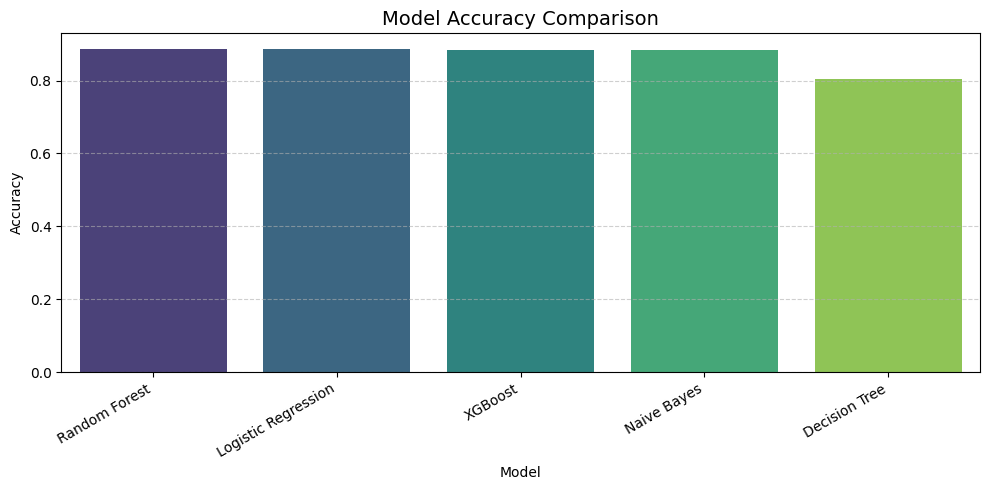

In [17]:
# 1) Accuracy Comparison
plt.figure(figsize=(10,5))
sns.barplot(data=results_df_sorted, x='Model', y='Accuracy', palette='viridis')
plt.title('Model Accuracy Comparison', fontsize=14)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

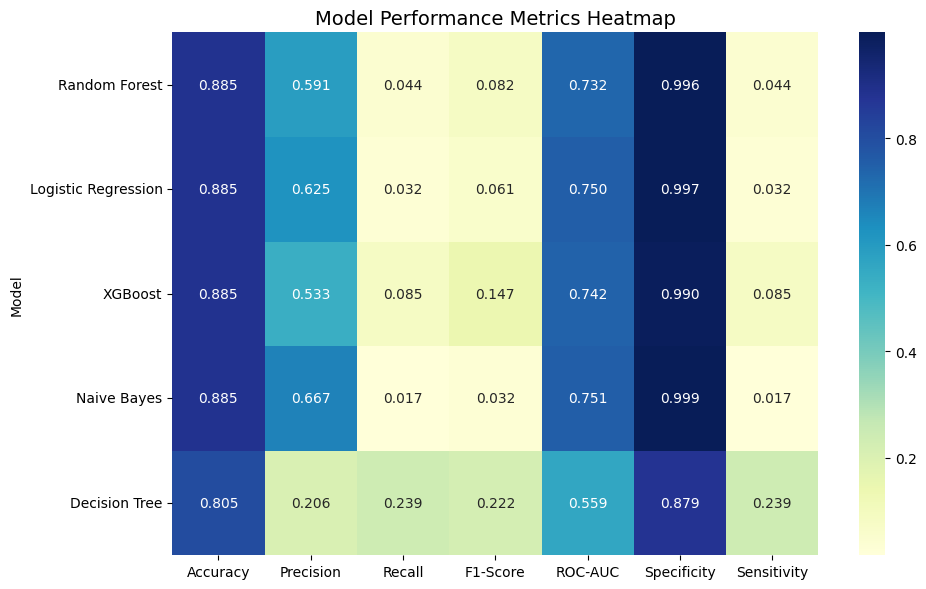

In [18]:
# 2) Heatmap of Metrics
metrics_cols = ['Accuracy','Precision','Recall','F1-Score','ROC-AUC','Specificity','Sensitivity']
plt.figure(figsize=(10,6))
sns.heatmap(results_df_sorted.set_index('Model')[metrics_cols], annot=True, cmap='YlGnBu', fmt=".3f", cbar=True)
plt.title('Model Performance Metrics Heatmap', fontsize=14)
plt.tight_layout()
plt.show()

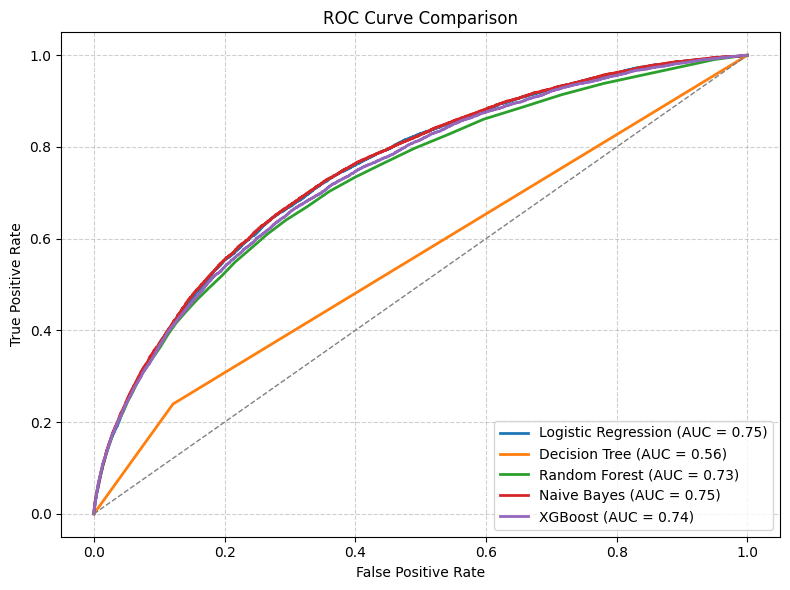

In [19]:
# 3) ROC Curve Comparison
plt.figure(figsize=(8,6))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## 8. Conclusion

The Random Forest model achieved the highest accuracy and balanced performance among all tested algorithms, showing strong specificity and reliable predictions.
XGBoost also performed competitively, offering better recall compared to others.
Overall, ensemble models like Random Forest and XGBoost proved most effective for predicting loan default in this dataset.

----